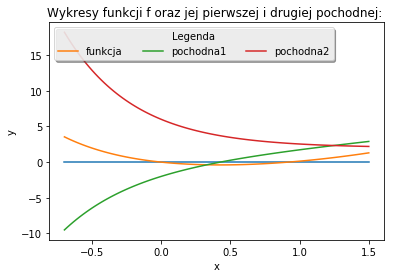

Funkcja f(x) ma oszacowane miejsca zerowe w punktach: x1=0 i x2=1

Dla metody bisekcji wybrane przedzialy to odpowiednio: dla x1 [-0.5,0.5], dla x2 [0.5, 1.5]

Dla metody siecznych wybrane przedzialy to odpowiednio: dla x1 [-0.5,0.25], dla x2 [0.75, 1.25]

Dla metody stycznych(Newtona) wybrane przedzialy to odpowiednio: dla x1 [-0.5,0.25] z punktem startowym -0.5, dla x2 [0.75, 1.25] z punktem startowym 1.25



In [12]:
#Anna Nagi

#zad1
from sympy import Symbol, Derivative
from numpy import  linspace
from math import e
import matplotlib.pyplot as plt

x= Symbol('x')

ffunkcja= pow(e,-2*x) + pow(x,2) - 1
fpochodna1= Derivative(ffunkcja, x)
fpochodna2 = Derivative(fpochodna1, x)

plt.title('Wykresy funkcji f oraz jej pierwszej i drugiej pochodnej: ')
plt.xlabel('x')
plt.ylabel('y')

zbior = linspace(-0.7,1.5,100)

funkcja = []
for i in zbior:
    funkcja.append(ffunkcja.doit().subs({x:i}))

pochodna1 = []
for i in zbior:
    pochodna1.append(fpochodna1.doit().subs({x:i}))

pochodna2 = []
for i in zbior:
    pochodna2.append(fpochodna2.doit().subs({x:i}))
    
funkcja0 = []
for i in zbior:
    funkcja0.append(0)
    

w_x0 = plt.plot(zbior, funkcja0)
w_funkcja = plt.plot(zbior, funkcja, label = "funkcja")  
w_pochodna1 = plt.plot(zbior, pochodna1, label = "pochodna1")
w_pochodna2 = plt.plot(zbior, pochodna2, label = "pochodna2")

plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, title="Legenda")
plt.show()

print('Funkcja f(x) ma oszacowane miejsca zerowe w punktach: x1=0 i x2=1\n')
print('Dla metody bisekcji wybrane przedzialy to odpowiednio: dla x1 [-0.5,0.5], dla x2 [0.5, 1.5]\n')
print('Dla metody siecznych wybrane przedzialy to odpowiednio: dla x1 [-0.5,0.25], dla x2 [0.75, 1.25]\n')
print('Dla metody stycznych(Newtona) wybrane przedzialy to odpowiednio: dla x1 [-0.5,0.25] z punktem startowym -0.5, dla x2 [0.75, 1.25] z punktem startowym 1.25\n')


In [13]:

#zad2
import time
from math import e
from scipy.optimize import bisect

def bisekcja(funkcja, start, koniec, dokladnosc, max_iteracji):
    liczba_it=0
    for i in range(max_iteracji):
        helper = abs(start-koniec)
        helper1 = (pow(10,-10))
    
        if(helper < helper1):
            pierw = start
            return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
        
        else:
            z = float(start+koniec)/2
            if(abs(funkcja1(z)) < dokladnosc):
                pierw = z
                return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
            
            else:
                liczba_it+=1
                
                if( (funkcja1(start)*funkcja1(z)) < 0):
                    koniec = z
                
                elif( (funkcja1(start)*funkcja1(z)) > 0):
                    start = z
                    
                if((koniec-start) < dokladnosc):
                    pierw = z
                    return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
                
                else:
                    continue
    
    return 'Nie udalo sie znalezc pierwiastka'


funkcja1= lambda x: pow(e,-2*x) + pow(x,2) - 1




start1 = time.clock()
bisekcja(funkcja1, -0.49, 0.5, pow(10,-10), 15000)

elapsed1 = (time.clock() - start1)
print('\n\nczas dla mojej funkcji:')
print(elapsed1)
print('\nWynik mojej funkcji:')
print(bisekcja(funkcja1, -0.49, 0.5, pow(10,-10), 15000))

start2 = time.clock()
bisect(funkcja1, -0.49, 0.5, (), pow(10,-10))

elapsed2 = (time.clock() - start2)
print('\n\nczas dla bisect:')
print(elapsed2)
print('\nWynik bisect:')
print(bisect(funkcja1, -0.49, 0.5, (), pow(10,-10)))


print('\nWarunki wystarczajace zbieznosci metody bisekcji: 1)Jeżeli funkcja ciągła f przyjmuje na końcach przedziału domkniętego <a,b> wartości o znakach przeciwnych, tzn.f(a)·f(b)<0, to wewnątrz tego przedziału istnieje co najmniej jeden pierwiastek równania f(x) = 0.')




czas dla mojej funkcji:
0.00018334696392230398

Wynik mojej funkcji:
{'pierwiastek': 4.656617358826987e-12, 'liczba_iteracji': 30}


czas dla bisect:
0.00010683576260817063

Wynik bisect:
-5.2968966945505746e-11

Warunki wystarczajace zbieznosci metody bisekcji: 1)Jeżeli funkcja ciągła f przyjmuje na końcach przedziału domkniętego <a,b> wartości o znakach przeciwnych, tzn.f(a)·f(b)<0, to wewnątrz tego przedziału istnieje co najmniej jeden pierwiastek równania f(x) = 0.


In [14]:
#zad3
import time
from math import e
from sympy import Symbol, Derivative
from scipy.optimize import newton

x= Symbol('x')

ffunkcja= pow(e,-2*x) + pow(x,2) - 1
fpochodna1= Derivative(ffunkcja, x)
fpochodna2= Derivative(fpochodna1, x)

def styczne(ffunkcja, fpochodna1, startowy, dokladnosc, max_iteracji):
  
    xk = startowy
    xk1=0
    liczba_it=0
    for i in range(max_iteracji):
        helper = abs(xk-xk1)
        helper1 = (pow(10,-10))
    
        if(helper < helper1):
            pierw = xk
            return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
        else:
            h1 = ffunkcja.doit().subs({x:xk})
            h2 = fpochodna1.doit().subs({x:xk})
    
            xk1 = xk - h1/h2
       
            h3 =  ffunkcja.doit().subs({x:xk1})
            if(abs(h3) < dokladnosc):
                
                pierw = xk1
                return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
            
            else:
                liczba_it+=1
                xk = xk1
                
                a1 = ffunkcja.doit().subs({x:xk1})
                a2 = fpochodna1.doit().subs({x:xk1})
               
                xk1 = xk - a1/a2
              
                continue
         
        return 'Nie udalo sie odnalezc pierwiastka'

funkcja1= lambda x: pow(e,-2*x) + pow(x,2) - 1


print('Warunki wystarczające zbieznosci metody Newtona: \n1)funkcja f jest ciagla w przedziale zamknietym[a,b].\n2)Pierwsza i druga pochodna funkcji f(x) istnieja i sa ciagle w przedziale [a,b]\n3)f(a)*f(b)<0\n4)Pierwsza i druga pochodna maja staly znak w przedziale [a,b]\n5)Punktem startowym jest ten koniec przedzialu[a,b], w ktorym f(x) przyjmuje taki sam znak, co jej druga pochodna.')

print('\n\n')

start1 = time.clock()
styczne(ffunkcja, fpochodna1, -0.5, pow(10,-10), 15000)

elapsed1 = (time.clock() - start1)
print('\n\nczas dla mojej funkcji:')
print(elapsed1)
print('\nWynik mojej funkcji:')
print(styczne(ffunkcja, fpochodna1, -0.5, pow(10,-10), 15000))

start2 = time.clock()
newton(funkcja1, -0.5, fprime=None, args=(), tol=pow(10,-10), maxiter=15000)

elapsed2 = (time.clock() - start2)
print('\n\nczas dla newton:')
print(elapsed2)
print('\nWynik newton:')
print(newton(funkcja1, -0.5, fprime=None, args=(),tol=pow(10,-10), maxiter=15000))



Warunki wystarczające zbieznosci metody Newtona: 
1)funkcja f jest ciagla w przedziale zamknietym[a,b].
2)Pierwsza i druga pochodna funkcji f(x) istnieja i sa ciagle w przedziale [a,b]
3)f(a)*f(b)<0
4)Pierwsza i druga pochodna maja staly znak w przedziale [a,b]
5)Punktem startowym jest ten koniec przedzialu[a,b], w ktorym f(x) przyjmuje taki sam znak, co jej druga pochodna.





czas dla mojej funkcji:
0.00788671863529089

Wynik mojej funkcji:
{'pierwiastek': -9.19162442488439e-11, 'liczba_iteracji': 5}


czas dla newton:
0.00011616639699241205

Wynik newton:
4.529353800073197e-17


In [16]:

#zad4
import time
from math import e
from sympy import Symbol, Derivative
from scipy.optimize import newton

x= Symbol('x')

ffunkcja= pow(e,-2*x) + pow(x,2) - 1
fpochodna1= Derivative(ffunkcja, x)
fpochodna2= Derivative(fpochodna1, x)

def sieczne(ffunkcja, start, koniec, dokladnosc, max_iteracji):
  
    liczba_it=0
    for i in range(max_iteracji):
        helper = abs(start-koniec)
        helper1 = (pow(10,-10))
    
        if(helper < helper1):
            pierw = start
            return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
        
        else:
            fx1 = ffunkcja.doit().subs({x:start})
            fx0 = ffunkcja.doit().subs({x:koniec})
        
            x3 = start - ((fx1/(fx0 - fx1))*(koniec-start))
            fx3 = ffunkcja.doit().subs({x:x3})
    
            if(abs(fx3) < dokladnosc):
                
                pierw = x3
                return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
            
            else:
                liczba_it+=1
                koniec = start
                start = x3
        
                continue
         
    return 'Nie udalo sie odnalezc pierwiastka'

funkcja1= lambda x: pow(e,-2*x) + pow(x,2) - 1


print('Warunki wystarczające zbieznosci metody siecznych: \n1)funkcja f jest ciagla w przedziale zamknietym[a,b].\n2)Pierwsza i druga pochodna funkcji f(x) istnieja i sa ciagle w przedziale [a,b]\n3)f(a)*f(b)<0\n4)Pierwsza i druga pochodna maja staly znak w przedziale [a,b]\n5)Punktem startowym jest ten koniec przedzialu[a,b], w ktorym f(x) przyjmuje taki sam znak, co jej druga pochodna.')

print('\n')

start5 = time.clock()
sieczne(ffunkcja, -0.5, 0.25, pow(10,-10), 15000)
elapsed5 = (time.clock() - start5)
print('\n\nczas dla mojej funkcji:')
print(elapsed5)
print('\nWynik mojej funkcji:')
print(sieczne(ffunkcja, -0.5, 0.25, pow(10,-10), 15000))

start6 = time.clock()
newton(funkcja1, -0.5, fprime=None, args=(), tol=pow(10,-10), maxiter=15000)
elapsed6 = (time.clock() - start6)
print('\n\nczas dla newton:')
print(elapsed6)
print('\nWynik newton:')
print(newton(funkcja1, -0.5, fprime=None, args=(),tol=pow(10,-10), maxiter=15000))


Warunki wystarczające zbieznosci metody siecznych: 
1)funkcja f jest ciagla w przedziale zamknietym[a,b].
2)Pierwsza i druga pochodna funkcji f(x) istnieja i sa ciagle w przedziale [a,b]
3)f(a)*f(b)<0
4)Pierwsza i druga pochodna maja staly znak w przedziale [a,b]
5)Punktem startowym jest ten koniec przedzialu[a,b], w ktorym f(x) przyjmuje taki sam znak, co jej druga pochodna.




czas dla mojej funkcji:
0.006554770590128101

Wynik mojej funkcji:
{'pierwiastek': 3.53890192977878e-11, 'liczba_iteracji': 6}


czas dla newton:
0.0001003043184937269

Wynik newton:
4.529353800073197e-17


In [17]:
#zad4.5 - porownanie liczby iteracji i czas obliczen utworzonych metod
import time
from math import e
from sympy import Symbol, Derivative

x= Symbol('x')

ffunkcja= pow(e,-2*x) + pow(x,2) - 1
fpochodna1= Derivative(ffunkcja, x)
fpochodna2= Derivative(fpochodna1, x)


def bisekcja(funkcja, start, koniec, dokladnosc, max_iteracji):
    liczba_it=0
    for i in range(max_iteracji):
        helper = abs(start-koniec)
        helper1 = (pow(10,-10))
        if(helper < helper1):
            pierw = start
            return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
        else:
            z = float(start+koniec)/2
            if(abs(funkcja1(z)) < dokladnosc):
                pierw = z
                return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
            else:
                liczba_it+=1
                if( (funkcja1(start)*funkcja1(z)) < 0):
                    koniec = z
                elif( (funkcja1(start)*funkcja1(z)) > 0):
                    start = z
                if((koniec-start) < dokladnosc):
                    pierw = z
                    return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
                else:
                    continue
    return 'Nie udalo sie znalezc pierwiastka'

funkcja1= lambda x: pow(e,-2*x) + pow(x,2) - 1

start1 = time.clock()
bisekcja(funkcja1, -0.49, 0.5, pow(10,-10), 15000)
elapsed1 = (time.clock() - start1)
print('\nczas dla metody bisekcji:')
print(elapsed1)
print('\nWynik metody bisekcji:')
print(bisekcja(funkcja1, -0.49, 0.5, pow(10,-10), 15000))




def styczne(ffunkcja, fpochodna1, startowy, dokladnosc, max_iteracji):
    xk = startowy
    xk1=0
    liczba_it=0
    for i in range(max_iteracji):
        helper = abs(xk-xk1)
        helper1 = (pow(10,-10))
        if(helper < helper1):
            pierw = xk
            return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
        else:
            h1 = ffunkcja.doit().subs({x:xk})
            h2 = fpochodna1.doit().subs({x:xk})
            xk1 = xk - h1/h2
            h3 =  ffunkcja.doit().subs({x:xk1})
            if(abs(h3) < dokladnosc):
                pierw = xk1
                return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
            else:
                liczba_it+=1
                xk = xk1
                a1 = ffunkcja.doit().subs({x:xk1})
                a2 = fpochodna1.doit().subs({x:xk1})
                xk1 = xk - a1/a2
                continue
        return 'Nie udalo sie odnalezc pierwiastka'

funkcja1= lambda x: pow(e,-2*x) + pow(x,2) - 1

print('\n\n')
start2 = time.clock()
styczne(ffunkcja, fpochodna1, -0.5, pow(10,-10), 15000)
elapsed2 = (time.clock() - start2)
print('\nczas dla metody newtona:')
print(elapsed2)
print('\nWynik metody newtona:')
print(styczne(ffunkcja, fpochodna1, -0.5, pow(10,-10), 15000))





def sieczne(ffunkcja, start, koniec, dokladnosc, max_iteracji):
    liczba_it=0
    for i in range(max_iteracji):
        helper = abs(start-koniec)
        helper1 = (pow(10,-10))
        if(helper < helper1):
            pierw = start
            return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
        else:
            fx1 = ffunkcja.doit().subs({x:start})
            fx0 = ffunkcja.doit().subs({x:koniec})
            x3 = start - ((fx1/(fx0 - fx1))*(koniec-start))
            fx3 = ffunkcja.doit().subs({x:x3})
            if(abs(fx3) < dokladnosc):
                pierw = x3
                return {'pierwiastek':pierw, 'liczba_iteracji':liczba_it}
            else:
                liczba_it+=1
                koniec = start
                start = x3
                continue
    return 'Nie udalo sie odnalezc pierwiastka'

funkcja1= lambda x: pow(e,-2*x) + pow(x,2) - 1


print('\n\n')

start5 = time.clock()
sieczne(ffunkcja, -0.5, 0.25, pow(10,-10), 15000)
elapsed5 = (time.clock() - start5)
print('\nczas dla metody siecznych:')
print(elapsed5)
print('\nWynik metody siecznych:')
print(sieczne(ffunkcja, -0.5, 0.25, pow(10,-10), 15000))



czas dla metody bisekcji:
0.00018567962229099066

Wynik metody bisekcji:
{'pierwiastek': 4.656617358826987e-12, 'liczba_iteracji': 30}




czas dla metody newtona:
0.005087061815856941

Wynik metody newtona:
{'pierwiastek': -9.19162442488439e-11, 'liczba_iteracji': 5}




czas dla metody siecznych:
0.003651077198355779

Wynik metody siecznych:
{'pierwiastek': 3.53890192977878e-11, 'liczba_iteracji': 6}
